####  2.4 - Without rounding error, the following code’s output would be f (x) = x. (Note that this has nothing to do with catastrophic cancellation.) 

#### Determine what’s going on, remembering our comment (section 2.4) on one or two iterations being the culprits.

In [1]:
from math import sqrt
def f(x,nmax=100):  ### Definimos 1 variable x 
    for i in range(nmax):
        x = sqrt(x) ### De esa variable x, sacamos su raiz cuadrada
    for i in range(nmax):
        x = x**2    ###  Despues elevamos dicho número al cuadrado 
    return x ### Nos retorna ese número
for xin in (5.0, 0.5): 
    xout = f(xin); print(xin, xout)

5.0 1.0
0.5 0.0


Como podemos observar, al realizar las iteraciones, $\sqrt x$ 100 veces, tendríamos la raíz 100 esíma de un número (si pudieramos representar el número de una manera excata, entonces no tendríamos error alguno, elevando al cuadrado este resultado, tendríamos el número que inicialmente propusimos. Sin embargo, dado que no podemos representar, ese número de manera exacta, vamos sumando errores de divisiones (en la parte de las raices) y de multiplicaciones, en la parte de las multiplicacones, lo cual ocasiona este error. 

### 2.7 We promised to return to the distinction between catastrophic and benign cancellation. Take y and ˜y to be: $\bar{x} = 1234567891234567.0$  and $\bar{y}= 1234567891234566.0$ .  Now, if we try to evaluate $\bar{x}^2 −\bar{y}^2 $ we will experience catastrophic cancellation: each of the squaring operations leads to a rounding error and then the subtraction exacerbates that dramatically.Write a Python code that does the following:
### (a) Carries out the calculation 12345678912345672 − 12345678912345662 using integers, i.e., exactly.
### (b) Carries out the subtraction 1234567891234567.02−1234567891234566.02 using floats, i.e., exhibiting catastrophic cancellation.
### (c) Now, we will employ a trick: x2 − y2 can be re-expressed as (x − y)(x + y). Try using this trick for the floats and see what happens. Does your answer match the integer answer or the catastrophic-cancellation answer? Why?

In [2]:
### a)
# Definimos las variables enteras
x = 1234567891234567
y = 1234567891234566

# Calculate calculamos el resultado
f_exa = x**2 - y**2
print("El resultado exacto es:", f_exa)

El resultado exacto es: 2469135782469133


In [3]:
### b)
# Definimos las variables float
x_f = 1234567891234567.0
y_f = 1234567891234566.0

# Calculamos el resultado
f_float = x_f**2 - y_f**2
print("El resultado aprox:", f_float)

El resultado aprox: 2533274790395904.0


In [4]:
# c)
dife = x_f - y_f
suma = x_f + y_f
b_c = dife* suma
print("Resultado exibiendo ", b_c)

Resultado exibiendo  2469135782469133.0


Como podemos observar este resultado se asemeja al reultado a) ya que al ser una multiplicación el error, es menor al error, por suma

### 2.10 As a statistical warmup to chapters 6 and 7, evaluate the mean of the n values $x_i: μ = \sum^{n−1}_{i=0} \dfrac{xi}{n}$. You can evaluate the variance using a two-pass algorithm: 
$σ^2 = \dfrac{1}{n}\sum^{n−1}_{i=0}(x_i − μ)2 $
### This is called a two-pass algorithm because you need to evaluate the mean first, so you have to loop through the xi once to get the mean and a second time time to get the variance. Many people prefer the following one-pass algorithm:
$σ^2 = \dfrac{1}{n}\sum^{n−1}_{i=0}(x_i)^2 - \mu$
### You should be able to see that this formula allows you to keep running sums of the xi and the x2i values in parallel and then perform only one subtraction at the end. Naively, you might think that the two-pass algorithm will suffer from more roundoff error problems, since it involves n subtractions. On the other hand, if you solved problem 2.7 on  $\bar{x}^2 −\bar{y}^2 $ , you might be more wary of subtracting the squares of two nearly equal numbers (which is what the one-pass algorithmdoes).Write two Python functions, one for each algorithm, and test them on the two cases below:
$xi = 0, 0.01, 0.02, . . . , 0.09 ~~~~~~$ 
$xi = 123456789.0, 123456789.01, 123456789.02, . . . , 123456789.09$ 

In [5]:
import numpy as np

def dos_pasos(val):
    #### Al sacar la media debemos ver cuantos elementos tenemos por ende hacemos un conteo de los mismos
    #### con respecto a loos valores ingresados.
    n = len(val)
    # Calculamos la media
    media = sum(val) / n
    # Calculamos la varianza
    var = sum((x - media)** 2 for x in val) / n
    return media, var

def un_paso(val):
    n = len(val)
    #### Definimos un origen del cual con ese mismo, empezaremos a hacer dos sumas
    ####  una para calcular la media y otra para calcular los momentos segundos
    suma_x = 0
    suma_x_cuadra = 0
 
    for x in val:
        #### calculamos los valores de los cuales obtendremos los momentos cuadradados y las medianas 
        suma_x += x 
        suma_x_cuadra += x**2
    media = suma_x / n 
    var = (suma_x_cuadra) /n - (media **2)
    return media, var 

# Define the test cases
caso_1  = [0 + i * 0.01 for i in range(10)]    # [0, 0.01, 0.02, ..., 0.09]
caso_2  = [123456789.0 + i * 0.01 for i in range(10)] # [123456789.0, 123456789.01, ..., 123456789.09]

# Calculando la media y varianza usando dos pasos: 
media_1 , var_1 = dos_pasos(caso_1)
media_2, var_2 = dos_pasos(caso_2)

# Calculando la media y varianza usando dos pasos: 
media_3 , var_3 = un_paso(caso_1)
media_4, var_4 = un_paso(caso_2)

print('La media es:' ,  media_1 , 'La varianza es: ' , var_1)

print('La media es:' ,  media_2 , 'La varianza es: ' , var_2)

print('La media es:' ,  media_3 , 'La varianza es: ' , var_3)

print('La media es:' ,  media_4 , 'La varianza es: ' , var_4)

La media es: 0.045000000000000005 La varianza es:  0.0008249999999999997
La media es: 123456789.04499996 La varianza es:  0.0008249999612588655
La media es: 0.045000000000000005 La varianza es:  0.0008249999999999998
La media es: 123456789.04499996 La varianza es:  10.0


### 2.13 This problem studies a new rational function: $t(x) =\dfrac{7x^4 − 101x^3 + 540x^2 − 1204x + 958}{x^4 − 14x^3 + 72x^2 − 151x + 112}$
### Notice that the denominator is the same as in problem 2.12. 
### (a) Plot t(x), evaluated via Horner’s rule, along with the following (equivalent) continued fraction, from x = 0 to x = 4: $u(x) = 7 −  \dfrac{3}{ x - 2 \dfrac{1}{x- 7 + \dfrac{10}{ x -2 +  \dfrac{2}{x-3}}} }$ You may wish to know that: u(1) = 10, u(2) = 7, u(3) = 4.6, u(4) = 5.5 (2.104)
### (b) Evaluate each of these functions for x = 1077 (make sure to use floats in your code). Do you understand what is happening? Are you starting to prefer one formulation over the other? (What happens if you use integers instead of floats?)
### (c) Plot the two Python functions (t(x) and u(x)) for x = 2.400 + 2−52i, where i goes from 0 to 800.Was your intuition (about which formulation is better) correct?

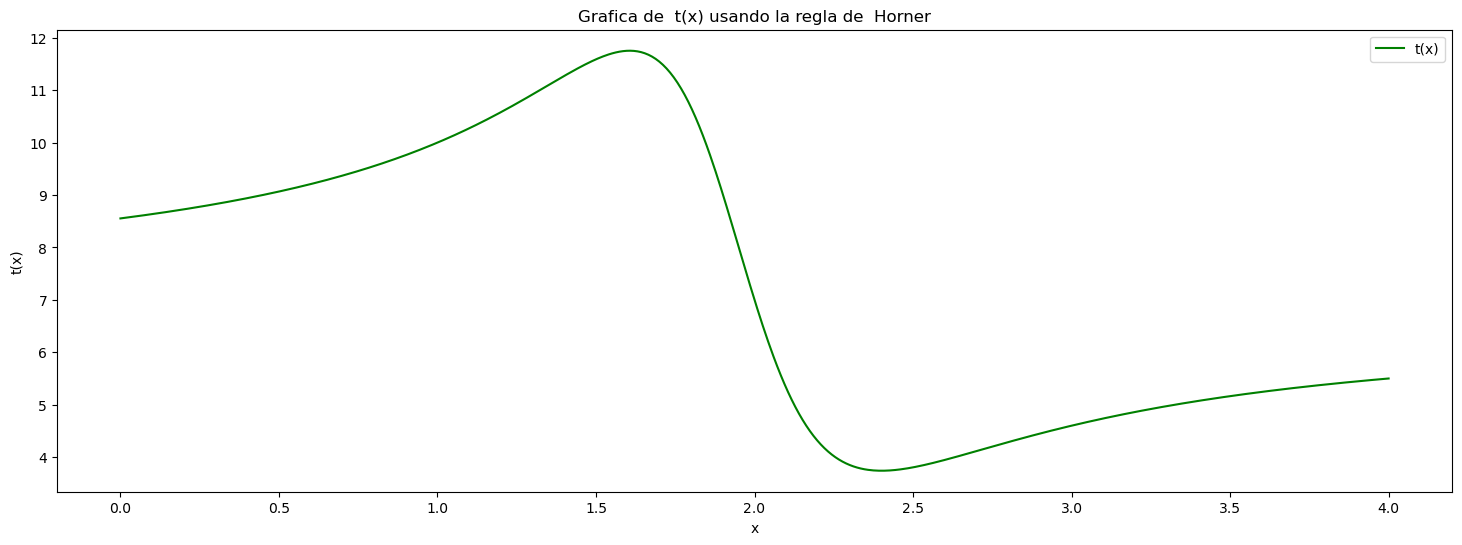

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### a) 
def naive(C,x):
    Px = 0
    for i in range(len(C)):
        Px  = Px + C[i]*x**i
    return Px 

def horner(C,x): 
    Px = 0
    for c in reversed(C):
        Px = c + x*Px
    return Px 

def t(x):
    ### Definimos el numerador y el denominador de la función
    n = horner([958,-1204,540, -101, 7],x)
    d = horner([112,-151,72,-14, 1],x)
    return n / d
#### Creamos todo el espacio de las x, donde va a correr nuestra función
x_v  = np.linspace(0,4,700)
t_v = t(x_v)
### Definimos el tamaño de la figura tanto en x como y
plt.figure(figsize=(18, 6))
#### x vs t 
plt.plot(x_v, t_v, label='t(x)', color='green')
plt.xlabel('x')
plt.ylabel('t(x)')
plt.title('Grafica de  t(x) usando la regla de  Horner')
plt.legend()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_2392\2568714644.py:8: RuntimeWarning: divide by zero encountered in divide
  frac_4 = 10 / frac_3


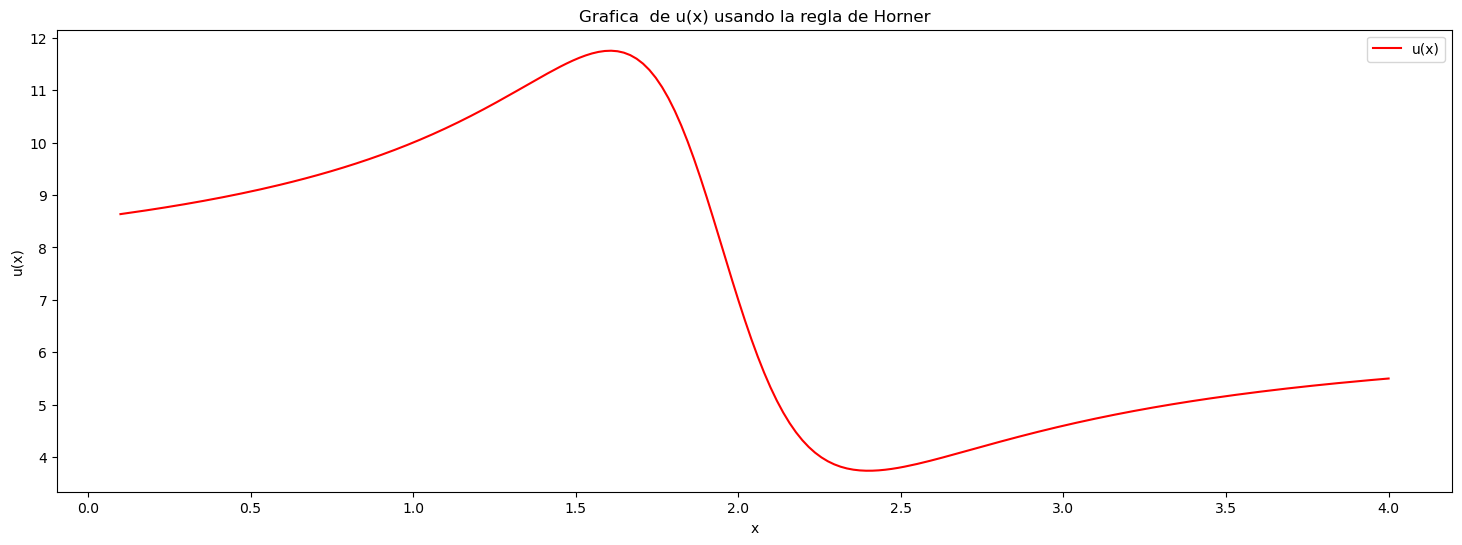

In [7]:
### a)

def u(x):
    # Definimos la función anidada, usando diviciones  a las cuales denomine como fracciones
    frac_1 = x - 3
    frac_2 = 2 / frac_1
    frac_3 = x - 2 - frac_2
    frac_4 = 10 / frac_3
    frac_5 = x - 7 + frac_4
    frac_6 = 1 / frac_5
    frac_7 = x - 2 - frac_6
    frac_8 = 3 / frac_7
    return 7 - frac_8
#### Usando las definiciones que le dimos a las x a usar, tenemos que, evaluando el resultado
#### en el mismo espacio que en la función continua.

x_v  = np.linspace(0.1,4,200)
u_v = u(x_v)

plt.figure(figsize=(18, 6))
plt.plot(x_v, u_v, label='u(x)', color='red')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Grafica  de u(x) usando la regla de Horner')
plt.legend()
plt.show()
### Un error ocurre debido a la divisón sobre 10.

In [8]:
### b) 
a = 10000000000000000.0
t_g = t(a)
u_g = u(a)

print(t_g, u_g)

### Como podemos ver, a numeros muy grandes, ambas partes convergen en en el mismo limite, cuando x tiende
### a infinito, t y u tienden a 7 sin, embargo, siguen existiendo estas diferencias palpables de que el redondeo
### sigue afectando al error, donde u, converge un poco más rapido que t 

7.0 7.0


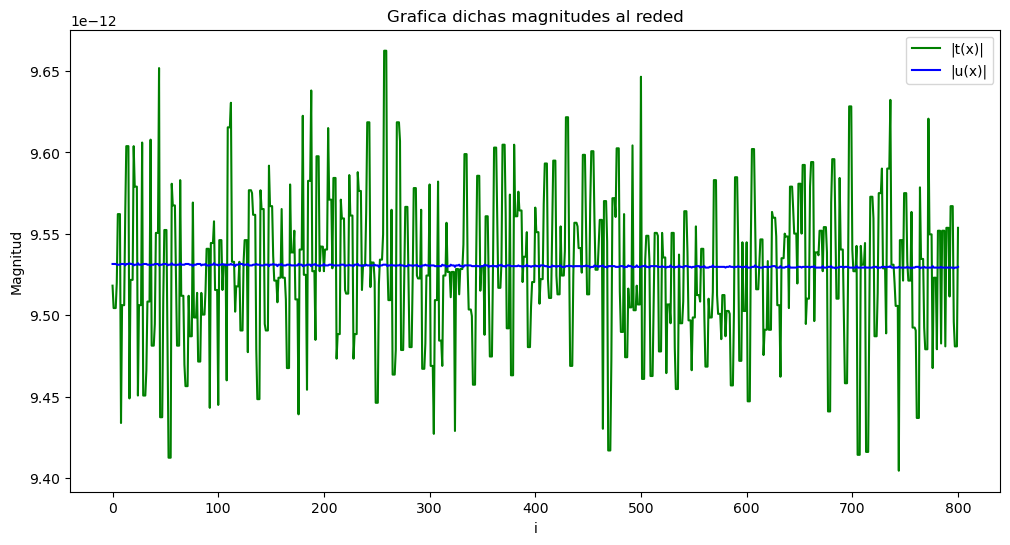

In [9]:
### c)
#### Utiliazamos la función de honer, la cual nos replica el polinomio de n grado
def horner(C,x): 
    Px = 0
    for c in reversed(C):
        Px = c + x*Px
    return Px 

def t_compleja(x):
    ### Definimos el numerador y el denominador de la función
    n = horner([958,-1204,540, -101, 7],x)
    d = horner([112,-151,72,-14, 1],x)
    return n / d


def u_compleja(x):
    frac_1 = x - 3
    frac_2 = 2 / frac_1
    frac_3 = x - 2 - frac_2
    frac_4 = 10 / frac_3
    frac_5 = x - 7 + frac_4
    frac_6 = 1 / frac_5
    frac_7 = x - 2 - frac_6
    frac_8 = 3 / frac_7
    return 7 - frac_8

#### En numpy podemos trabajar con los numeros complejos, así que definimos, un arreglo de números complejos
### dicho arreglo será contruido con el uso de pequeños segmentos del error de maquina
i_v = np.arange(0, 801)
x_compleja  = 2.400 + 2**(-52)* i_v

### Les dotamos los valores complejos a nuestras funciones (Completa, Horner)
t_com_v = t_compleja(x_compleja)
u_com_v = u_compleja(x_compleja)

plt.figure(figsize=(12, 6))
#### Usando el plano del los complejos, podemos ver que, la magnitud de La función compleja y la de Horner
#### varía, denotando, que de hecho una es másconfiable que la otra.
plt.plot(i_v, -3.74071082390 + np.abs(t_com_v), label='|t(x)|', color='green')
plt.plot(i_v,  -3.74071082390 + np.abs(u_com_v), label='|u(x)|', color='blue')
plt.xlabel('i')
plt.ylabel('Magnitud')
plt.title('Grafica dichas magnitudes al reded')
plt.legend()
plt.show()

#### Dado que la función de horner, convergia mas rapido, supusimos que dicha función era  una mejor aproximación
### Y de hecho lo es, porque, mientrás más información caiga en los reales, menor información se pierde en general

### 2.16  In this problem we will learn how to accelerate the convergence of a sequence. We will accomplish this by transforming a sequence $p_n$ obeying $limn→∞ p_n = ξ$ into another sequence qn that converges more quickly to ξ.
### (a) Assume the sequence $p_n$ converges to ξ like a geometric series with a factor C: $p_{n+1} − ξ = C(p_n − ξ)$, n = 1, 2, . . .  
### Apply this equation a second time taking n → n + 1 and then eliminate C; you can then solve the resulting equation for ξ. This takes the form:
### $q_n = p_n - \dfrac{ (p_{n+1} − p_n)^2}{p_n + p_{n+2} − 2p_{n+1} } $
### where we took the opportunity to write qn on the left-hand side (instead of ξ) to emphasize that this is a new sequence (in practice, the starting relation Eq. is likely to be only approximately valid). This technique is known as Aitken extrapolation or Aitken’s $Δ^2$ method.
### (b) We will now apply Aitken extrapolation, Eq. (2.107), to the following problem: 
### $\sum_{k = 1}^{\infty}(-1)^{ k +1} = ln 2 = 0.693 147 180 559 945 3 . . . $ 
### To do so, treat the partial sums as the terms of your original sequence: 
$p_n = \sum_{k=1}^{n} (−1)^{k+1} k$ 
### You should find that when n = 100 or so the Aitken-extrapolated qn’s have converged on six significant figures of the true answer, whereas the (untransformed) partial sums pn’s are still struggling with the second significant figure.

In [10]:
### a) se encuetra en las notas

In [11]:
### b) 

import numpy as np

# Definimos la suma en terminos de p:
def suma_p(n):
    return np.sum([(-1)**(k+1) / k for k in range(1, n+1)])

# Definimos el termino de extrapolación con sus respectivos
# donde dicho termino qn, esta determinado del pn, pn1 y pn2
def ait_extrapolacion(pn, pn1, pn2):
    num = (pn1 - pn) ** 2
    deno = pn2 - 2 * pn1 + pn
    if deno != 0:
        return pn - num / deno
    else:
        return np.nan  # Esta parte se agrega debido a que queremos
    ### evitar a división por cero, por ende, evitamos a toda
    ### costa este númer0

# Definamos la suma parcial, incluyendo dicha suma en un arreglo
n = 100
sumas_par = [suma_p(i) for i in range(1, n+1)]

# Creamos una lista de la extrapolación obtenida por el metodo
# expuesto, para que de esa lista comparemos con el valor esperado
ait_extrapolacion_v = []

# Aplicamos el metodo de extrapolación a cada suma parcial tal que 
for i in range(1, len(sumas_par) - 1):
    pn = sumas_par[i - 1]
    pn1 = sumas_par[i]
    pn2 = sumas_par[i + 1]
    ### Genera los pn y los coloca en la funcion de estrapolacion
    qn = ait_extrapolacion(pn, pn1, pn2)
    ait_extrapolacion_v.append(qn)

# Calculamos el valor del logaritmo
valor_real = np.log(2)

# Comparemos los valores obtenidos por el metodo y comparemoslo con el valor real
# donde cada i representa una n donde se aplicó

for i in range(len(ait_extrapolacion_v)):
    print("Diferencia con el valor real: ", abs( ait_extrapolacion_v[i] - valor_real ))

Diferencia con el valor real:  0.006852819440054669
Diferencia con el valor real:  0.0026709900837548206
Diferencia con el valor real:  0.0012972638844991335
Diferencia con el valor real:  0.0007229381357030107
Diferencia con el valor real:  0.0004425630297982819
Diferencia con el valor real:  0.0002900377028024481
Diferencia con el valor real:  0.0002001583756289227
Diferencia con el valor real:  0.00014383887239310944
Diferencia con el valor real:  0.00010678769402305832
Diferencia con el valor real:  8.142988549886265e-05
Diferencia con el valor real:  6.349765073299096e-05
Diferencia con el valor real:  5.04624632271522e-05
Diferencia con el valor real:  4.07617659281545e-05
Diferencia con el valor real:  3.33947042238103e-05
Diferencia con el valor real:  2.7700114935469422e-05
Diferencia con el valor real:  2.3229347758668695e-05
Diferencia con el valor real:  1.967069514130504e-05
Diferencia con el valor real:  1.680302554296631e-05
Diferencia con el valor real:  1.4466517921696

### 2.19   Compare the output of legendre.py with that of the recurrence relation for n = 1000: 
### $P_n(x) = 2xP_{n−1}(x) − P_{n−2}(x) − \dfrac{xP_{n−1}(x) − P_{n−2}(x)}{n} $


In [12]:
def primera_recurrencia(x, n_max):
    Q = np.zeros(n_max + 1)  # Creamos un arreglo para almacenar los valores
    Q[0] = 1  #### Creamos los valores base 
    Q[1] = x  
    
    # Calcular los valores de Pn(x) usando la relación de recurrencia
    for n in range(1, n_max):
        Q[n+1] = ((2* n + 1)* x* Q[n] - n*Q[n-1])/(n+1)
    return Q


def segunda_recurrencia(x, n_max):
    P = np.zeros(n_max + 1)   # Creamos un arreglo para almacenar los valores
    P[0] = 1   ### Creamos los valores base
    P[1] = x  
    
    # Calculamos los valores de Pn(x) usando la relación de recurrencia
    for n in range(2, n_max + 1):
        P[n] = 2 * x * P[n-1] - P[n-2] - (x * P[n-1] - P[n-2]) / n
    
    return P

x = 4.0  # Definimos a x  y a n (interacciones)
n_max = 100  

# veamos la diferencia de cada uno. 
P = primera_recurrencia(x, n_max)
Q = segunda_recurrencia(x, n_max)
B = Q - P 
abs(B) 

#### Los errores de recurrencia se ven afectado en gran medida cuando se va aumentando a n 

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.90625000e-03, 3.12500000e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.55360000e+04, 1.04857600e+06, 8.38860800e+06, 1.00663296e+08,
       5.36870912e+08, 6.44245094e+09, 5.15396076e+10, 4.12316860e+11,
       2.74877907e+12, 1.75921860e+13, 1.05553116e+14, 2.81474977e+14,
       4.50359963e+15, 3.60287970e+16, 1.44115188e+17, 0.00000000e+00,
       0.00000000e+00, 7.37869763e+19, 5.90295810e+20, 4.72236648e+21,
       3.77789319e+22, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.54742505e+26, 2.47588008e+27, 2.97105609e+28, 1.58456325e+29,
       1.26765060e+30, 1.01412048e+31, 8.11296384e+31, 3.24518554e+32,
      

### 2.22  This problem studies the evaluation of Chebyshev polynomials and their extrema, known as Chebyshev points. First, implement the following recurrence relation:
$T_{n+1}(x) = 2xT_n(x) − T_{n−1}(x)$
### starting from the known functions T0(x) = 1 and T1(x) = x. Plot the first few Chebyshev polynomials from x = −1 to x = +1. Second, use trigonometric identities to show (analytically) that the representation:
$T_n(x) = cos(n cos^{−1} x)$
### Numbers is equivalent to that in Eq. (2.122). Finally, use Eq. (2.123) to show that the n extrema of Tn−1(x) are:
$x_j = − cos(jπ/n − 1)~~~~~ j = 0, 1, . . . , n − 1$

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-1.         -0.99331104 -0.98662207 ...  0.98662207  0.99331104
   1.        ]
 [ 1.          0.97333363  0.94684623 ...  0.94684623  0.97333363
   1.        ]
 ...
 [ 1.          0.76845998  0.55491926 ...  0.55491926  0.76845998
   1.        ]
 [-1.         -0.68943115 -0.41187509 ...  0.41187509  0.68943115
   1.        ]
 [ 1.          0.60117916  0.25781085 ...  0.25781085  0.60117916
   1.        ]]
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-1.         -0.99331104 -0.98662207 ...  0.98662207  0.99331104
   1.        ]
 [ 1.          0.97333363  0.94684623 ...  0.94684623  0.97333363
   1.        ]
 ...
 [ 1.          0.76845998  0.55491926 ...  0.55491926  0.76845998
   1.        ]
 [-1.         -0.68943115 -0.41187509 ...  0.41187509  0.68943115
   1.        ]
 [ 1.          0.60117916  0.25781085 ...  0.25781085  0.60117916
   1.        ]]


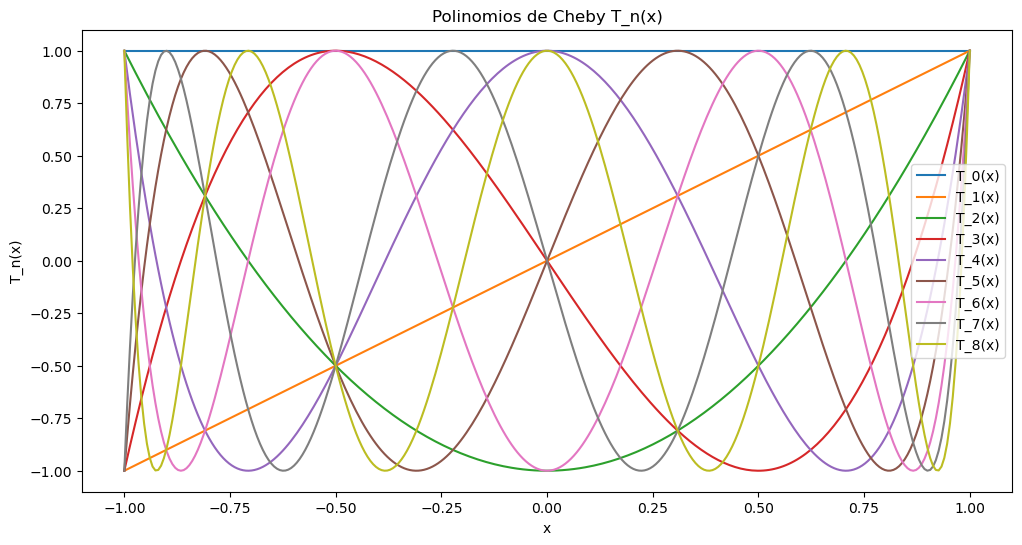

In [13]:
### a) 
import numpy as np
import matplotlib.pyplot as plt

def Polinomio_Chevy(n, x):
    T = np.zeros((n + 1, len(x))) ### Creamos una matriz doble, la cual colocará
    #### los valores de los polinomios, con respecto al tamaño de la muestra (x)
    T[0, :] = 1
    T[1, :] = x
    
    ### Definimos los 2 primeros valores
    for i in range(2, n + 1):
        
        #### Hacemos las iteraciones hasta cortar los polinomios donde queramos 
        T[i, :] = 2 * x * T[i-1, :] - T[i-2, :]
    print(T)   
    return T

# Definimos los valores los cuales nuestro polinomio vivira
x = np.linspace(-1, 1, 300)

### Asignamos el numero al cual cortar los polinomios de chevy y a su vez una matriz con estos valores 
n_max = 8
T = Polinomio_Chevy(n_max, x)
### Ploteamos como serían los valores del polinomio número 6
print(T[:, :])

# Creamos la grafica donde vivirá nuestra información
plt.figure(figsize=(12, 6))
for i in range(n_max + 1):
    #### Ploteamos los 6 polinomios de chevy
    plt.plot(x, T[i, :], label= f'T_{i}(x)')

plt.xlabel('x')
plt.ylabel('T_n(x)')
plt.title('Polinomios de Cheby T_n(x)')
plt.legend()
plt.show()


In [14]:
### b) Dicha parte se encuentra en los apuntes

### 2.25 Generalize our code in multipole.py so that it works regardless of whether or not r > ri. This necessitates changes to all three functions in that program.

In [15]:
import numpy as np

def chargearray(nvals):
    vals = [-0.5 + i / (nvals - 1) for i in range(nvals)]  # Creamos el espacio en 3 dimensiones
    qtopos = {}
    
    for i, posx in enumerate(vals):
        for j, posy in enumerate(vals):
            for k, posz in enumerate(vals):  ### Dado que estabamos creando una matriz con 
                ####  rango 3 x val
                count = k + nvals * (j + nvals * i) + 1
                ### Hacemos el contador de tal manera que repitamos lo hecho en 2 dimensiones
                key = 1.02 * count if (i + j + k) % 2 == 0 else -count
                qtopos[key] = (posx, posy, posz)  # Guardamos la matriz resultante
    return qtopos


#### nuestras correciones de dichas sumas, quedan inalteradas. 
def kahansum(xs):
    s = 0
    e = 0
    for x in xs:
        tem = s
        y = x + e
        s = tem + y
        e = (tem - s) + y
    return s

### Calculamos las raices, con las sumas corregidas. 
def vecmag(rs):
    sq = [r**2 for r in rs]
    return np.sqrt(kahansum(sq))

### Finalmente obtenemos los valores del potencial
def fullpot(qtopos, rs):
    portvals = []
    for q, pos in qtopos.items():
        ### Realizamos el calculo de las diferencias de las posiciones.
        diffs = [r - rp for r, rp in zip(rs, pos)] 
        R = vecmag(diffs)
        portvals.append(q / R)
    return kahansum(portvals)

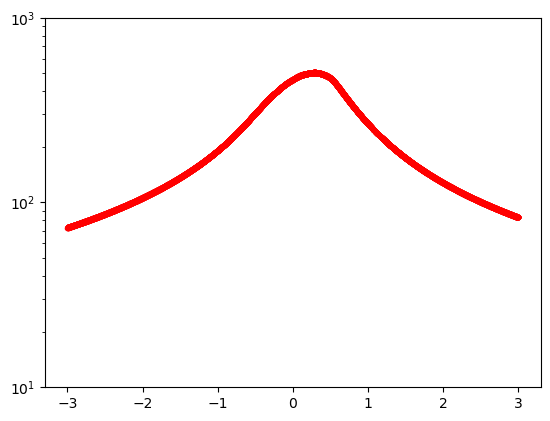

In [16]:
X= np.linspace(-3,3, 8000)
F = fullpot(chargearray(6), [X,0,0])
### Generamos  una grafica con respecto a x
#print(chargearray(36))
plt.semilogy(X,F, 'r.')
plt.ylim((1e1, 1e3))
plt.show()

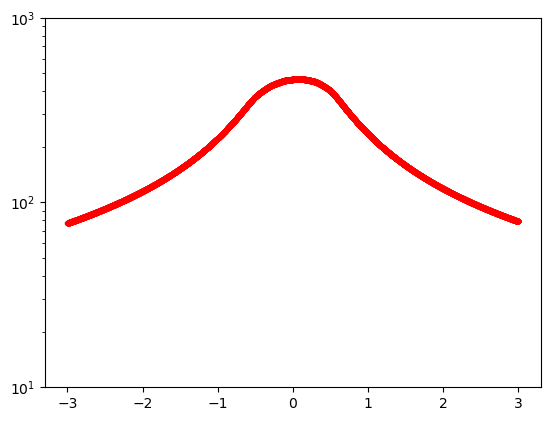

In [17]:
Y= np.linspace(-3,3, 8000)
F = fullpot(chargearray(6), [0,Y,0])
### Creamos una grafica ahora con respecto a Y 
plt.semilogy(Y,F, 'r.')
plt.ylim((1e1, 1e3))
plt.show()

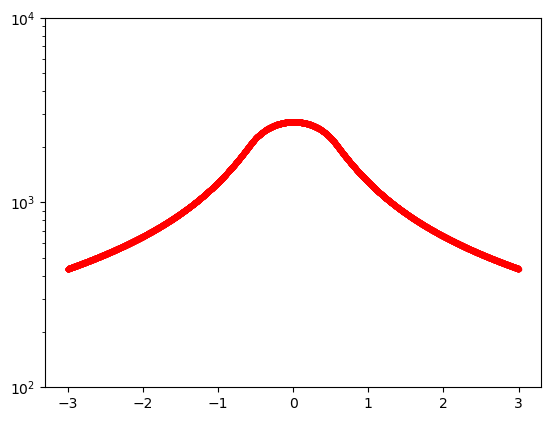

In [18]:
Z= np.linspace(-3,3, 8000)
F = fullpot(chargearray(8), [0,0,Z])
### Generamos una grafica con respecto a z
plt.semilogy(Z,F, 'r.')
plt.ylim((1e2, 1e4))
plt.show()

### 2.28  When implementing Hartree–Fock theory for Coulomb interactions, one optionis to employ Gaussian-type orbitals; the (nuclear-attraction) integrals involved in this approach
$fn(x) = \int_0^1 dt ~~ exp(−xt^2)t^{2n}$ 
### obey the following recurrence relation: 
$fn(x) =  \dfrac{(2n − 1) f_{n−1}(x) − e^{−x} }{2x}$ 
which is closer since this involves an x dependence.
### Start with f30(x) = 1 and employ backward recursion to plot f10(x).

[0.04761905 0.04757555 0.04753208 0.04748866 0.04744528 0.04740194
 0.04735864 0.04731537 0.04727215 0.04722897 0.04718583 0.04714272
 0.04709966 0.04705664 0.04701365 0.04697071 0.0469278  0.04688494
 0.04684211 0.04679933 0.04675658 0.04671387 0.0466712  0.04662857
 0.04658598 0.04654343 0.04650092 0.04645845 0.04641601 0.04637362
 0.04633126 0.04628895 0.04624667 0.04620443 0.04616223 0.04612007
 0.04607795 0.04603587 0.04599382 0.04595182 0.04590985 0.04586792
 0.04582603 0.04578418 0.04574236 0.04570059 0.04565885 0.04561716
 0.0455755  0.04553388 0.04549229 0.04545075 0.04540924 0.04536778
 0.04532635 0.04528495 0.0452436  0.04520228 0.04516101 0.04511977
 0.04507857 0.0450374  0.04499628 0.04495519 0.04491414 0.04487313
 0.04483215 0.04479121 0.04475032 0.04470945 0.04466863 0.04462784
 0.04458709 0.04454638 0.04450571 0.04446507 0.04442447 0.04438391
 0.04434339 0.0443029  0.04426245 0.04422204 0.04418166 0.04414132
 0.04410102 0.04406076 0.04402053 0.04398034 0.04394019 0.0439

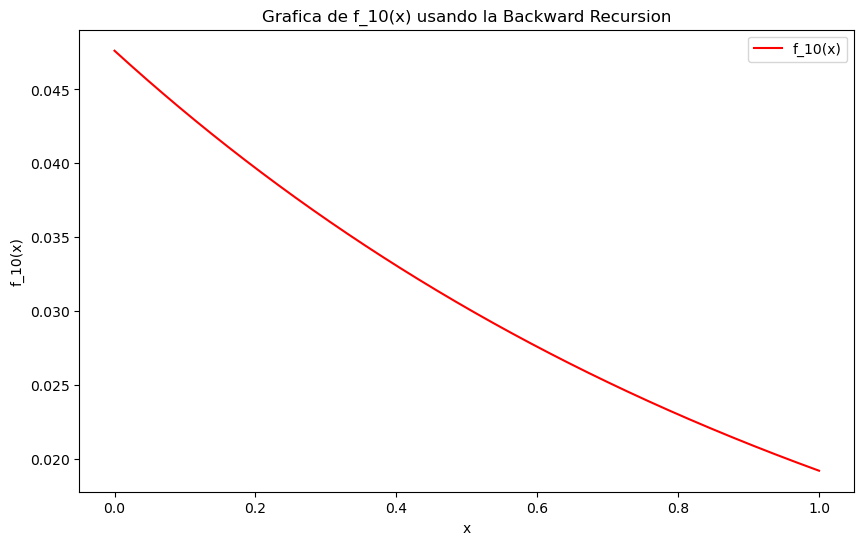

In [19]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt

def fn(x, n_empe = 30 , n_fin = 10):
    #### creamos un arreglo  
    f_n_v = {}
    ### A la primera entrada le asignamos nuestro primero valor 
    ### el cual será una entrada de unos (el valor primero de los polinomios de legendre)
    ### p_0 = 1 y p_1 = xm con dimenciones de los x elementos (pasos) que queramos darles 
    f_n_v[n_empe] = np.ones_like(x)
    ### Realizamos la recursión, haciendo pasos hacia atrás de manera unitaria
    for n in range(n_empe, n_fin, -1):
        f_antes = f_n_v[n]
        f_ahora = (   2*x* f_antes + np.exp(-x)   ) / (2*n -1 ) 
        f_n_v[n - 1] = f_ahora
    return f_n_v

### Definimos los valores los cuales x  que va a agarrar nuestra
### recurrencia evitando hacer a x = 0 ya que tendriamos divisiones entre cero
x = np.linspace(0, 1, 1000)  

# definimos las variables a ocupar y aplicamos la función de recurrencia
n_empe = 30
n_fin = 10
f_v = fn(x, n_empe, n_fin)
print(f_v[n_fin])
# Graficamos la figura 
plt.figure(figsize=(10, 6))
#### Graficamos a x vs los valores finales obtendios de nuestra recurrencia
plt.plot(x, f_v[n_fin], label=f'f_{10}(x)', color='red')

plt.xlabel('x')
plt.ylabel(f'f_{n_fin}(x)')
plt.title(f'Grafica de f_{10}(x) usando la Backward Recursion')
plt.legend()
plt.show()